In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import cv2
import os
import IPython
import tensorflow as tf
from six.moves import urllib
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import tensor_shape
from tensorflow.python.platform import gfile
from tensorflow.python.platform import tf_logging as logging
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [27]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print(train_images.reshape)
print(test_images.reshape)

<built-in method reshape of numpy.ndarray object at 0x7e99c37b8b70>
<built-in method reshape of numpy.ndarray object at 0x7e99c37b8d50>


In [28]:
def imagining_preprocess(imgs):
  sample_images = imgs.reshape(imgs.shape[0], 28, 28, 1)
  sample_images = sample_images.astype('float32')
  sample_images /= 255
  return sample_images
test_images = imagining_preprocess(test_images)
train_images = imagining_preprocess(train_images)

Text(0, 0.5, '9')

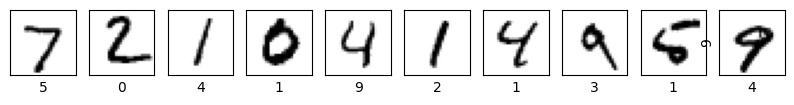

In [29]:
plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.ylabel(test_labels[i])

In [30]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 175s 93ms/step - accuracy: 0.8858 - loss: 0.3619
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 91ms/step - accuracy: 0.9741 - loss: 0.0859
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 91ms/step - accuracy: 0.9821 - loss: 0.0579
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 92ms/step - accuracy: 0.9852 - loss: 0.0473
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 91ms/step - accuracy: 0.9882 - loss: 0.0397


In [32]:
model.fit(test_images, test_labels, epochs=5)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.9836 - loss: 0.0523
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9882 - loss: 0.0369
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9917 - loss: 0.0235
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.9933 - loss: 0.0194
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9937 - loss: 0.0179


In [33]:
print(test_images.reshape)
test_loss,test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

<built-in method reshape of numpy.ndarray object at 0x7e99c37b8e70>
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9993 - loss: 0.0018
Test accuracy: 0.9995999932289124


In [42]:
print(train_images.reshape)
train_loss,train_acc = model.evaluate(train_images, train_labels)
print('Train accuracy:', train_acc)

<built-in method reshape of numpy.ndarray object at 0x7e99e1c658f0>
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9948 - loss: 0.0163
Train accuracy: 0.9948333501815796


#CONCLUSION : Train & Test data_Samples of images in a data_sets has a lot of varies in their accuracy's and loss in defining a sample of epochs-trails.. in Training and Testing..